In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales = pd.read_csv('C:/Users\Pratik/Desktop/Internship/raw data/supermarket sales/supermarket_sales - Sheet1.csv')

In [3]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#check the rows and columns

sales.shape

(1000, 17)

In [5]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
# here the date is given as object but it as to be DateTime

sales['Date'] = pd.to_datetime(sales['Date'])

In [8]:
sales['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [9]:
## to get an overall summary of the dataframe 'Sales'

sales.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858


## Data Cleaning

In [10]:
## 1.Checking the null values

sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
##  handling unit price using mean value
avg_unit_price = sales["Unit price"].astype("float").mean(axis=0)
sales["Unit price"].replace(np.nan, avg_unit_price, inplace=True)



In [12]:
## handling quantity using mode value

from scipy import stats
mode = stats.mode(sales['Quantity'])

print(mode)

ModeResult(mode=10, count=119)


In [13]:
sales['Quantity'].replace(np.nan, "mode", inplace=True)

In [14]:
## rest all values will drop

sales.dropna(inplace=True)

In [15]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [16]:
##now we will calculate the linear relationship between columns

In [17]:
non_numeric_columns = sales.select_dtypes(exclude=['float', 'int']).columns
print("Columns with non-numeric values:", non_numeric_columns)



Columns with non-numeric values: Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Date', 'Time', 'Payment'],
      dtype='object')


In [18]:
sales[non_numeric_columns] = sales[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

In [19]:
correlation_matrix = sales.corr()


In [20]:
correlation_matrix.dropna(inplace=True)

In [21]:
correlation_matrix.dropna(axis=1, inplace=True)

In [22]:
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []


In [23]:
sales.corr()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Branch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit price,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.010778,0.633962,0.633962,-0.006473,NaN,NaN,0.633962,NaN,0.633962,-0.008778
Quantity,NaN,NaN,NaN,NaN,NaN,NaN,0.010778,1.000000,0.705510,0.705510,-0.029563,NaN,NaN,0.705510,NaN,0.705510,-0.015815
Tax 5%,NaN,NaN,NaN,NaN,NaN,NaN,0.633962,0.705510,1.000000,1.000000,-0.022899,NaN,NaN,1.000000,NaN,1.000000,-0.036442
Total,NaN,NaN,NaN,NaN,NaN,NaN,0.633962,0.705510,1.000000,1.000000,-0.022899,NaN,NaN,1.000000,NaN,1.000000,-0.036442


In [24]:
np.round(sales.corr(),2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Branch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit price,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.01,0.63,0.63,-0.01,NaN,NaN,0.63,NaN,0.63,-0.01
Quantity,NaN,NaN,NaN,NaN,NaN,NaN,0.01,1.00,0.71,0.71,-0.03,NaN,NaN,0.71,NaN,0.71,-0.02
Tax 5%,NaN,NaN,NaN,NaN,NaN,NaN,0.63,0.71,1.00,1.00,-0.02,NaN,NaN,1.00,NaN,1.00,-0.04
Total,NaN,NaN,NaN,NaN,NaN,NaN,0.63,0.71,1.00,1.00,-0.02,NaN,NaN,1.00,NaN,1.00,-0.04


## Exploratory Data Analysis

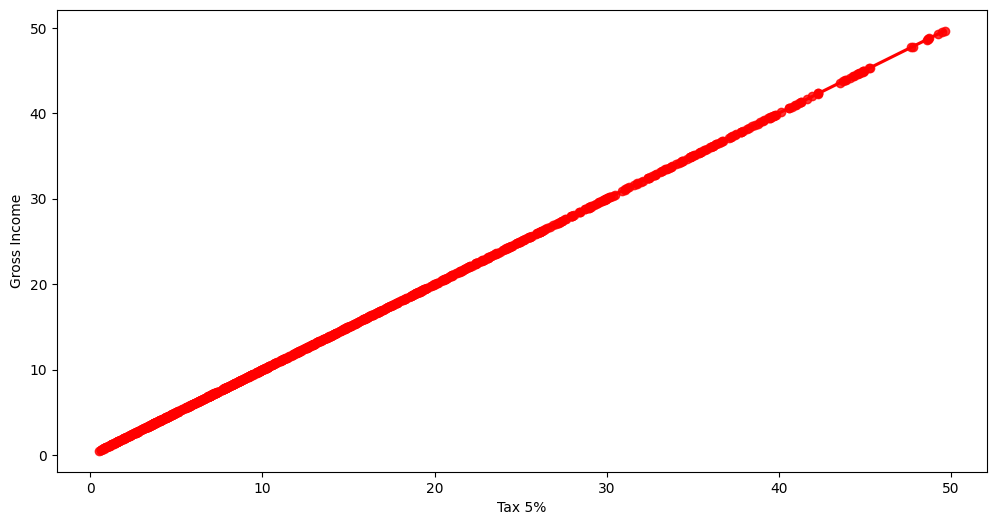

In [25]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Tax 5%',y='gross income',data=sales,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

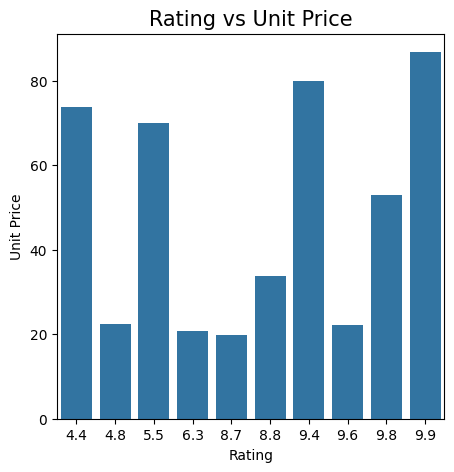

In [26]:
## bar plot of rating vs Unit price
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=sales[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()


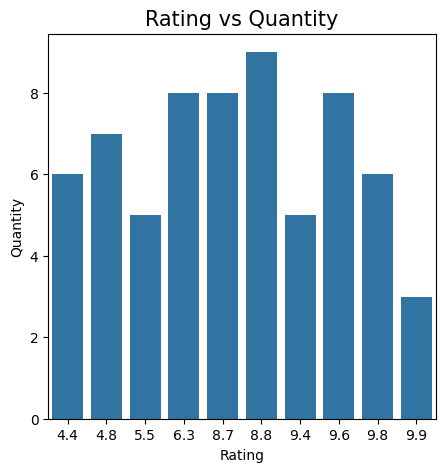

In [27]:
## rating vs Quantitiy
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=sales[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()


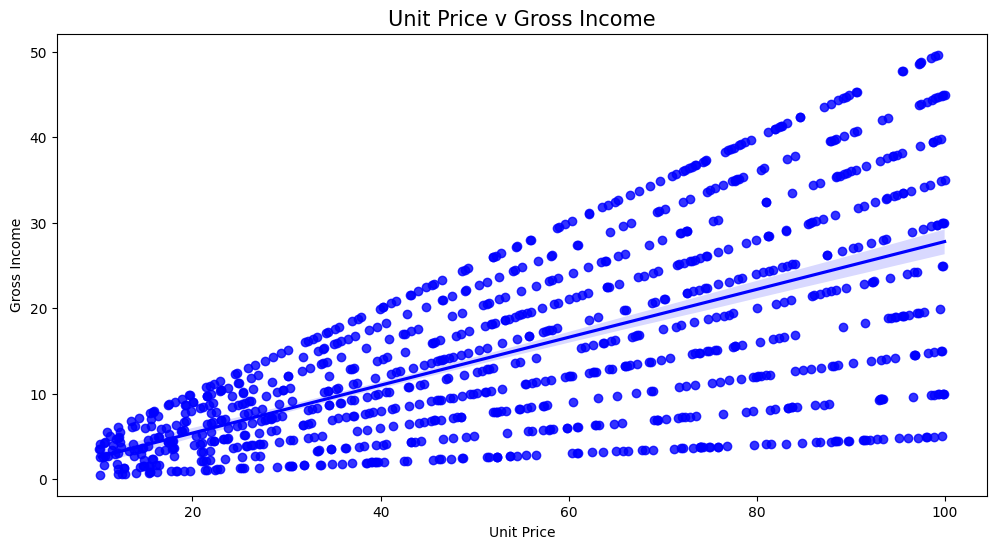

In [28]:
## unit price vs gross income

plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=sales,color='blue')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

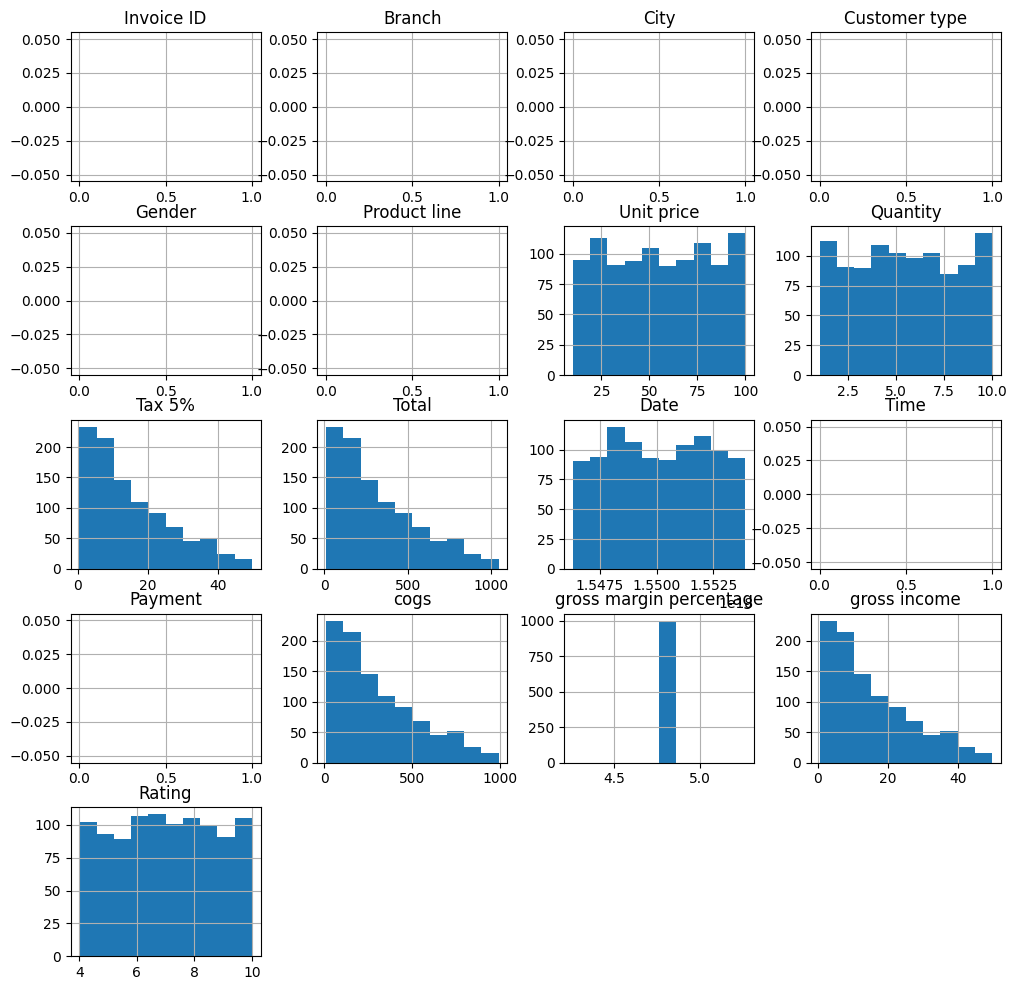

In [29]:
## histogram for all columns
sales.hist(figsize=(12,12))
plt.show()

<Axes: >

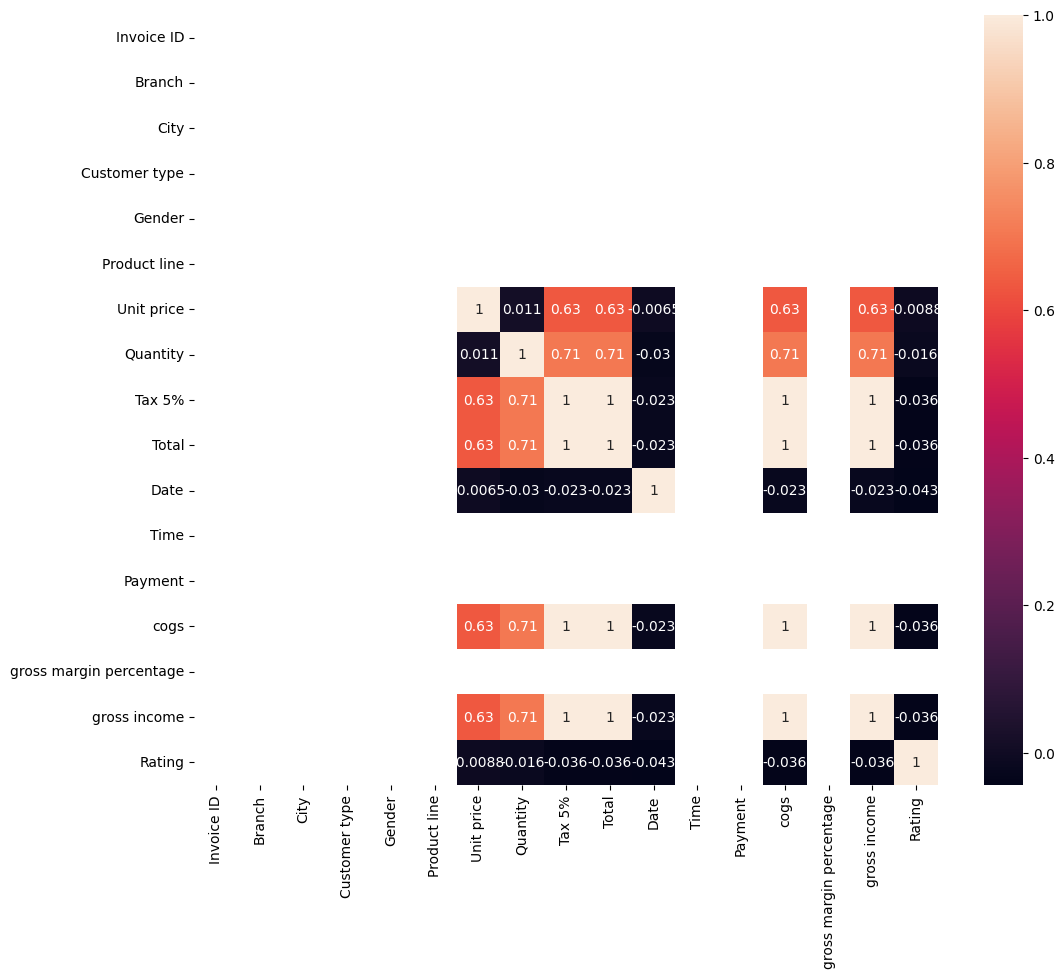

In [32]:
## heatmap
plt.figure(figsize = (12,10))

sns.heatmap(sales.corr(), annot =True)